In [42]:
import os


In [43]:
os.chdir("C:/Users/User/Desktop/datasets")

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
hack=pd.read_csv("Bookcsv.csv")
hack

,Year,Tax,Unemployement,Death,Consumption
0,1968,4.56,2.01,800.0,1.20
1,1969,4.89,2.25,889.0,1.20
2,1970,4.62,2.45,910.0,1.31
3,1971,4.62,2.65,NaN,1.30
4,1972,NaN,2.78,900.0,1.60
5,1973,4.80,2.86,790.0,1.80
6,1974,4.82,2.98,855.0,1.90
7,1975,4.91,2.99,974.0,1.05
8,1976,5.01,3.03,1021.0,1.98
9,1977,NaN,3.05,1234.0,1.31


In [45]:
hack.corr()

,Year,Tax,Unemployement,Death,Consumption
Year,1.000000,0.971614,0.996203,0.813517,0.848402
Tax,0.971614,1.000000,0.952066,0.911623,0.924027
Unemployement,0.996203,0.952066,1.000000,0.770262,0.814843
Death,0.813517,0.911623,0.770262,1.000000,0.937853
Consumption,0.848402,0.924027,0.814843,0.937853,1.000000


In [46]:
# from the correlation table you get to know that consumption of alcohol and death have high correlation, unemployment also has a high affect on alcohol consumption thus causing deaths,even if the tax is increasing year by year the consumption isnt decreasing with years.

In [47]:
hack.describe()

,Year,Tax,Unemployement,Death,Consumption
count,51.000000,46.000000,50.000000,47.000000,51.000000
mean,1993.000000,9.596957,4.618400,2922.787234,2.448039
std,14.866069,3.988459,1.348987,2749.198887,1.400099
min,1968.000000,4.560000,2.010000,400.000000,1.010000
25%,1980.500000,6.312500,3.492500,1103.000000,1.420000
50%,1993.000000,8.865000,4.795000,1350.000000,2.060000
75%,2005.500000,12.682500,5.832500,4264.000000,2.625000
max,2018.000000,18.000000,6.750000,9105.000000,5.900000


In [48]:
# here u see that the consumption from 50% to 75% range hasnt changed that highly which indicates that people are getting educated and employement is increasing year by year thus the consumption is gradually not that much increasing from the years93 to 2005 but if you see the years from 2005 to 2018 the consumption has highly increased as alcohol vendors and factories have increased.

In [49]:
hack.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
Tax              5
Unemployement    1
Death            4
Consumption      0
dtype: int64

In [50]:
features=hack.iloc[:,:].values

In [51]:
# removing null values and replacing it with the mean

In [52]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:
imputer.fit(features[:,:])
features[:,:]=imputer.fit_transform(features[:,:])

In [54]:
df=pd.DataFrame(features,columns=hack.columns)

In [55]:
df

,Year,Tax,Unemployement,Death,Consumption
0,1968.0,4.560000,2.0100,800.000000,1.20
1,1969.0,4.890000,2.2500,889.000000,1.20
2,1970.0,4.620000,2.4500,910.000000,1.31
3,1971.0,4.620000,2.6500,2922.787234,1.30
4,1972.0,9.596957,2.7800,900.000000,1.60
5,1973.0,4.800000,2.8600,790.000000,1.80
6,1974.0,4.820000,2.9800,855.000000,1.90
7,1975.0,4.910000,2.9900,974.000000,1.05
8,1976.0,5.010000,3.0300,1021.000000,1.98
9,1977.0,9.596957,3.0500,1234.000000,1.31


In [21]:
import seaborn as sns
corr=df.corr()

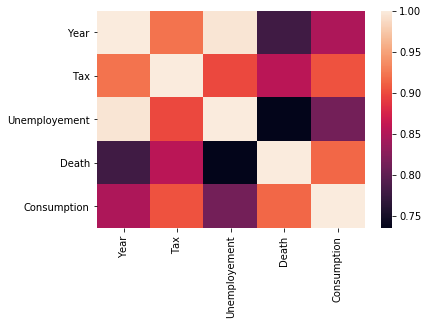

In [22]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [23]:
# correlation heat map light colours indicate positive corr(directly proportional) and dark indicate negative corr(inversely proportional)

In [24]:
df.pivot_table(hack,index=["Tax"]) 

,Consumption,Death,Unemployement,Year
Tax,,,,
4.560000,1.200,800.000000,2.0100,1968.0
4.620000,1.305,1916.393617,2.5500,1970.5
4.800000,1.800,790.000000,2.8600,1973.0
4.820000,1.900,855.000000,2.9800,1974.0
4.890000,1.200,889.000000,2.2500,1969.0
4.910000,1.050,974.000000,2.9900,1975.0
5.010000,1.980,1021.000000,3.0300,1976.0
5.500000,1.100,2922.787234,3.2400,1979.0
5.800000,1.390,2922.787234,3.4600,1980.0


In [25]:
df.pivot_table(hack,index=["Unemployement"]) 

,Consumption,Death,Tax,Year
Unemployement,,,,
2.0100,1.20,800.000000,4.560000,1968.0
2.2500,1.20,889.000000,4.890000,1969.0
2.4500,1.31,910.000000,4.620000,1970.0
2.6500,1.30,2922.787234,4.620000,1971.0
2.7800,1.60,900.000000,9.596957,1972.0
2.8600,1.80,790.000000,4.800000,1973.0
2.9800,1.90,855.000000,4.820000,1974.0
2.9900,1.05,974.000000,4.910000,1975.0
3.0300,1.98,1021.000000,5.010000,1976.0


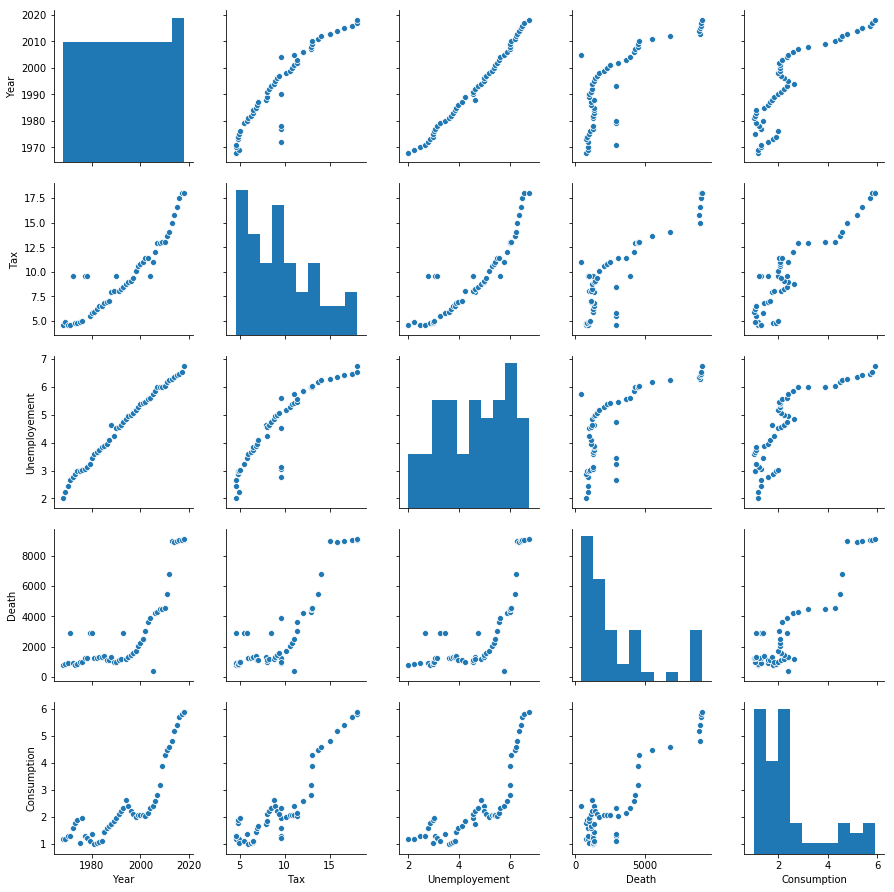

In [26]:
import seaborn as sns
sns.pairplot(df)

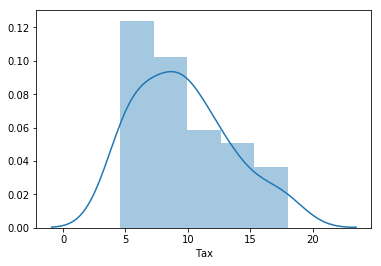

In [27]:
sns.distplot(df["Tax"])

In [28]:
# the graph is bell shaped so its normalized . this is the only column which is best normalized as compared to other features

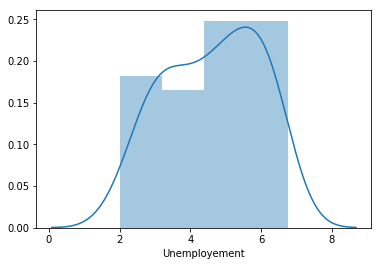

In [29]:
sns.distplot(df["Unemployement"])

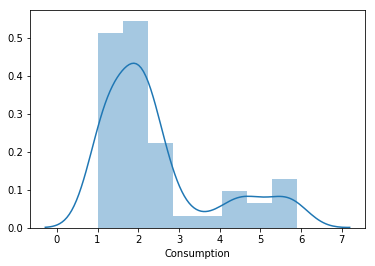

In [30]:
sns.distplot(df["Consumption"])

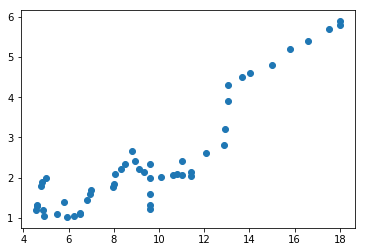

In [31]:
plt.scatter(df['Tax'],df['Consumption'])

In [32]:
# this indicates that high range of taxes isnt affecting a person to stop consuming alcohol as this graph shows that with increase in taxes consumption is also increasing..CONSUMPTION IS GRADUALLY INCREASING

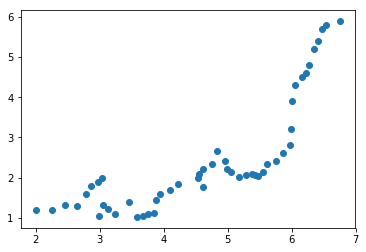

In [33]:
plt.scatter(df['Unemployement'],df['Consumption'])

In [34]:
# gradually increasing

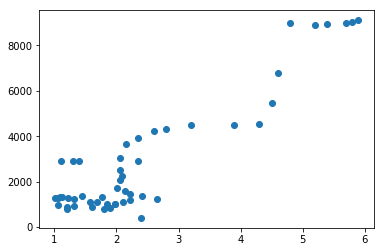

In [35]:
plt.scatter(df['Consumption'],df['Death'])

In [36]:
# gradually increasing

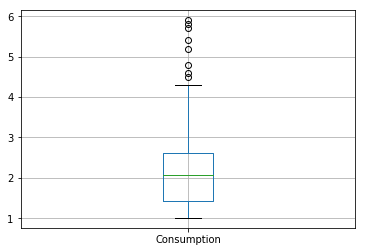

In [37]:
df.boxplot(column="Consumption")

In [38]:
# consumption has outliers but if we try to remove these we'll lose 18% of the data. so we keep them . here you can see that the graph is consistent till 75% but after 75% there is a high increase in consumption

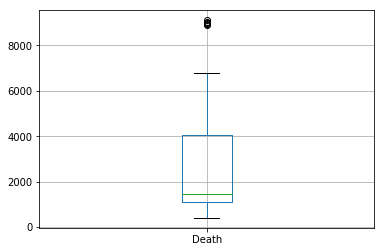

In [39]:
df.boxplot(column="Death")

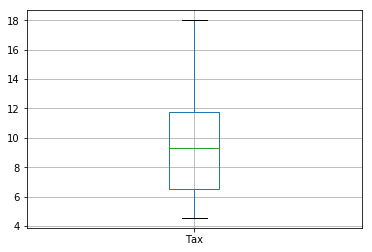

In [40]:
df.boxplot(column="Tax")

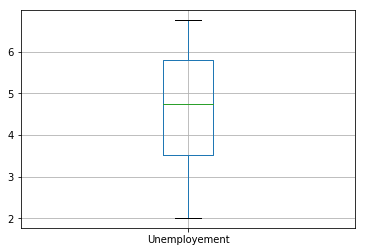

In [41]:
df.boxplot(column="Unemployement")

In [52]:
df.describe()

,Year,Tax,Unemployement,Death,Consumption
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1993.000000,9.596957,4.618400,2922.787234,2.448039
std,14.866069,3.783784,1.335429,2636.938937,1.400099
min,1968.000000,4.560000,2.010000,400.000000,1.010000
25%,1980.500000,6.500000,3.525000,1105.500000,1.420000
50%,1993.000000,9.340000,4.750000,1440.000000,2.060000
75%,2005.500000,11.745000,5.805000,4059.500000,2.625000
max,2018.000000,18.000000,6.750000,9105.000000,5.900000


In [53]:
IQR=12.682500-6.500000
IQR

6.182499999999999

In [55]:
 Lower_bound=99.0000-(1.5*IQR)
Upper_bound=140.2500+(1.5*IQR) 
print(Lower_bound,Upper_bound) 

89.72625 149.52375


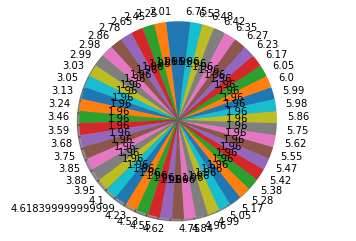

In [44]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Unemployement"].value_counts(), labels=df['Unemployement'].unique(),autopct='%1.2f',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# multiple regression

In [62]:

X = df[["Tax", "Unemployement"]]
y = df["Consumption"]

import statsmodels.api as sm
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     476.0
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           7.94e-33
Time:                        00:35:43   Log-Likelihood:                -48.188
No. Observations:                  51   AIC:                             100.4
Df Residuals:                      49   BIC:                             104.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Tax               0.3770      0.051      7.394      0.000       0.275       0.479
Unemployement    -0.2423      0.109     -2.216      0.031      -0.462      -0.023
==============================================================================
Omnibus:                        2.177   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.880
Skew:                          -0.466   Prob(JB):                        0.391
Kurtosis:                       2.874   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)


In [64]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)
predictions = model.predict(X)

In [65]:
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
predictions

array([0.66238606, 0.79293498, 0.75969035, 0.79681188, 2.11801237,
       0.88270026, 0.91018549, 0.93549695, 0.9689828 , 2.16812643,
       2.18297504, 1.13566195, 1.25468025, 1.31268924, 1.41279086,
       1.49093724, 1.50949801, 1.59846316, 1.64794185, 1.68881377,
       2.03782971, 1.97355816, 2.44282576, 2.04337723, 2.12152361,
       2.19777568, 2.29266499, 2.34881791, 2.40390306, 2.47237491,
       2.69271553, 2.84344007, 2.91412391, 2.97627745, 3.0950163 ,
       3.10986491, 2.6451381 , 3.03492182, 3.33159098, 3.57017468,
       3.57984921, 3.61037298, 3.62747183, 3.81132629, 3.90846583,
       4.17650553, 4.39724031, 4.61872516, 4.86441547, 5.00400355,
       5.04483723])

In [67]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.7684269328064627


In [ ]:
# we made a model with tax and unemployement as input variables and consumption as target variable . this accuracy shows that 81 percent of data was predicted correctly.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [0.26061539 0.18560765]
Intercept: -0.8990915155277399


The model performance
--------------------------------------
RMSE is 0.6036227567390916
R2 score is 0.8104105614553223




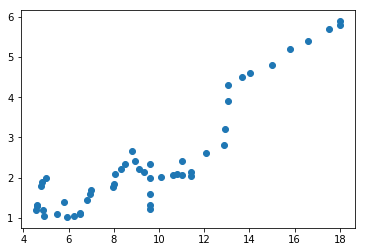

In [58]:
plt.scatter(df['Tax'],df['Consumption'])

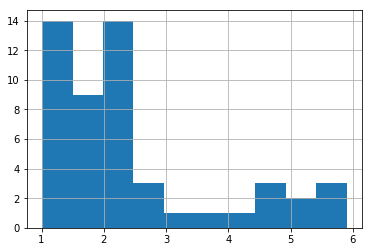

In [59]:
df['Consumption'].hist(bins=10)

In [ ]:
#high frequency of consumption in the range of 1 to 1.5 and 2 to 2.5

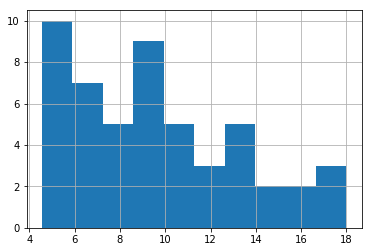

In [60]:
df['Tax'].hist(bins=10)

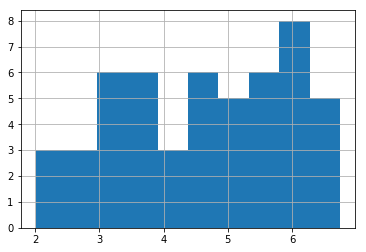

In [61]:
df['Unemployement'].hist(bins=10)

# linear regression

In [76]:
X=df["Tax"]
y=df["Consumption"]
import statsmodels.api as sm
model1=sm.OLS(y,X).fit()
predictions=model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     878.3
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           2.20e-33
Time:                        13:56:08   Log-Likelihood:                -50.623
No. Observations:                  51   AIC:                             103.2
Df Residuals:                      50   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tax            0.2656      0.009     29.637      0.000       0.248       0.284
==============================================================================
Omnibus:                        3.552   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.394
Skew:                           0.346   Prob(JB):                        0.302
Kurtosis:                       2.194   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

X_train=X_train.values.reshape(-1,1)

from sklearn import linear_model as lm
model=lm.LinearRegression()
result=model.fit(X_train,y_train)
result

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
Y_test_prediction=model1.predict(X_test)
Y_test_prediction


22    2.549144
2     1.227165
49    4.781162
26    2.337457
33    2.924477
44    3.721337
30    2.682763
50    4.781162
32    2.868697
27    2.371987
3     1.227165
29    2.480892
47    4.409293
41    3.461030
39    3.423843
21    2.127617
40    3.431812
38    3.203378
19    1.861997
24    2.204647
13    1.575127
dtype: float64

In [79]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)

Accuracy of the model: 0.7593659741574523


In [82]:
X=df["Unemployement"]
y=df["Consumption"]
import statsmodels.api as sm
model1=sm.OLS(y,X).fit()
predictions=model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     432.7
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           2.85e-26
Time:                        13:57:03   Log-Likelihood:                -67.298
No. Observations:                  51   AIC:                             136.6
Df Residuals:                      50   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Unemployement     0.5545      0.027     20.802      0.000       0.501       0.608
==============================================================================
Omnibus:                       13.695   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.031
Skew:                           1.294   Prob(JB):                     0.000545
Kurtosis:                       3.610   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

X_train=X_train.values.reshape(-1,1)

from sklearn import linear_model as lm
model=lm.LinearRegression()
result=model.fit(X_train,y_train)
result

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
Y_test_prediction=model1.predict(X_test)
Y_test_prediction


22    2.511737
2     1.358445
49    3.620671
26    2.683621
33    3.005212
44    3.454331
30    2.866596
50    3.742654
32    2.983034
27    2.750157
3     1.469338
29    2.800059
47    3.559680
41    3.326803
39    3.315714
21    2.345396
40    3.321259
38    3.249178
19    2.273316
24    2.561639
13    1.990537
dtype: float64

In [85]:
accuracy=model.score(X_train,y_train)
print('Accuracy of the model:',accuracy)

Accuracy of the model: 0.6433146094342435


In [86]:
mean=df["Consumption"].mean()
mean

2.4480392156862747

In [89]:
t=df["Tax"]
c=df["Consumption"]
c

0     1.20
1     1.20
2     1.31
3     1.30
4     1.60
5     1.80
6     1.90
7     1.05
8     1.98
9     1.31
10    1.22
11    1.10
12    1.39
13    1.01
14    1.05
15    1.09
16    1.12
17    1.45
18    1.58
19    1.68
20    1.76
21    1.84
22    1.98
23    2.10
24    2.22
25    2.34
26    2.65
27    2.41
28    2.22
29    2.13
30    2.01
31    2.06
32    2.09
33    2.06
34    2.05
35    2.15
36    2.34
37    2.40
38    2.60
39    2.80
40    3.20
41    3.90
42    4.30
43    4.50
44    4.60
45    4.80
46    5.20
47    5.40
48    5.70
49    5.80
50    5.90
Name: Consumption, dtype: float64

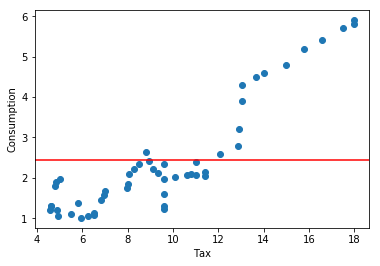

In [90]:
plt.plot(t,c,'o')
plt.ylabel("Consumption")
plt.xlabel("Tax")
plt.axhline(mean, color='r', linestyle='-')
plt.show()

C:\Users\sreev\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


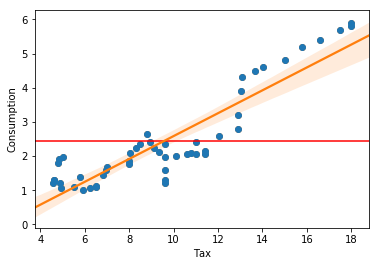

In [93]:
plt.plot(t,c,'o')
plt.ylabel("Consumption")
plt.xlabel("Tax")
plt.axhline(mean, color='r', linestyle='-')
sns.regplot(x='Tax', y='Consumption', data=df)

In [94]:
u=df["Unemployement"]
u

0     2.0100
1     2.2500
2     2.4500
3     2.6500
4     2.7800
5     2.8600
6     2.9800
7     2.9900
8     3.0300
9     3.0500
10    3.1300
11    3.2400
12    3.4600
13    3.5900
14    3.6800
15    3.7500
16    3.8500
17    3.8800
18    3.9500
19    4.1000
20    4.6184
21    4.2300
22    4.5300
23    4.5500
24    4.6200
25    4.7500
26    4.8400
27    4.9600
28    4.9900
29    5.0500
30    5.1700
31    5.2800
32    5.3800
33    5.4200
34    5.4700
35    5.5500
36    5.6200
37    5.7500
38    5.8600
39    5.9800
40    5.9900
41    6.0000
42    6.0500
43    6.1700
44    6.2300
45    6.2700
46    6.3500
47    6.4200
48    6.4800
49    6.5300
50    6.7500
Name: Unemployement, dtype: float64

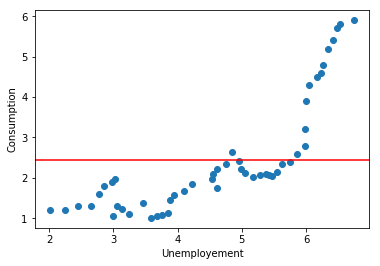

In [95]:
plt.plot(u,c,'o')
plt.ylabel("Consumption")
plt.xlabel("Unemployement")
plt.axhline(mean, color='r', linestyle='-')
plt.show()

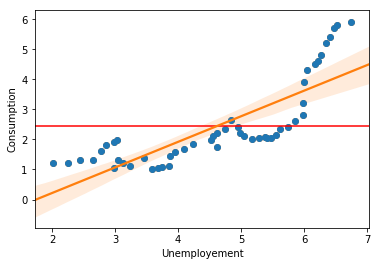

In [96]:
plt.plot(u,c,'o')
plt.ylabel("Consumption")
plt.xlabel("Unemployement")
plt.axhline(mean, color='r', linestyle='-')
sns.regplot(x='Unemployement', y='Consumption', data=df)